In [36]:

from zipfile import ZipFile
import os
# The data directory is currently hard-coded, if you want to train in different location you need to change it: 
#C:\Users\name\AppData\Roaming\Ultralytics\settings.yaml
# then you need to re-import it 
import ultralytics
ultralytics.checks()

from ultralytics import YOLO
import torch
import numpy as np
from PIL import Image  # to display images
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

print(f"Setup complete. Using torch {torch.__version__} on device ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Ultralytics YOLOv8.0.215 🚀 Python-3.9.13 torch-1.13.1+cpu CPU (AMD Ryzen 7 6800H with Radeon Graphics)
Setup complete ✅ (16 CPUs, 15.2 GB RAM, 452.2/453.8 GB disk)
Setup complete. Using torch 1.13.1+cpu on device (CPU)


# Load a model

In [37]:
# Load a model
model = YOLO("yolov8s-seg.pt")  # load a pretrained model

In [38]:
model

YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_runnin

# Use the model

In [39]:
# Use the model
results = model.predict(source="datasets2/train/images/0PPGMI7DR3TF_jpg.rf.46cf08c7142f20ee85e37212457244d2.jpg", conf=0.25) 


image 1/1 c:\Users\pancz\OneDrive\Asztali gép\Tanulmányok\ELTE Budapest\1.Semester\Deep Network\2.Assignment\datasets2\train\images\0PPGMI7DR3TF_jpg.rf.46cf08c7142f20ee85e37212457244d2.jpg: 640x640 1 bear, 478.1ms
Speed: 12.8ms preprocess, 478.1ms inference, 50.3ms postprocess per image at shape (1, 3, 640, 640)


### Let's see what the "results" contain

In [40]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

In [41]:
results[0].boxes.xyxy

tensor([[ 22.0889,  46.8041, 426.6392, 320.5055]])

In [42]:
results[0].boxes.conf

tensor([0.5241])

In [43]:
results[0].boxes.cls

tensor([21.])

In [44]:
results[0].masks

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
orig_shape: (640, 640)
shape: torch.Size([1, 640, 640])
xy: [array([[        218,          48],
       [        217,          49],
       [        212,          49],
       ...,
       [        248,          49],
       [        243,          49],
       [        242,          48]], dtype=float32)]
xyn: [array([[    0.34062,       0.075],
       [    0.33906,    0.076563],
       [    0.33125,    0.076563],
       ...,
       [     0.3875,    0.076563],
       [    0.37969,    0.076563],
       [    0.37813,       0.075]], dtype=float32)]

In [45]:
im_array = results[0].masks.data.cpu().numpy()

In [46]:
np.shape(im_array)

(1, 640, 640)

In [47]:
results[0].masks.shape[0]

1

In [48]:
(width,height)=np.shape(results[0].masks.data.detach().cpu().numpy()[0,:,:])

## Let's display the results

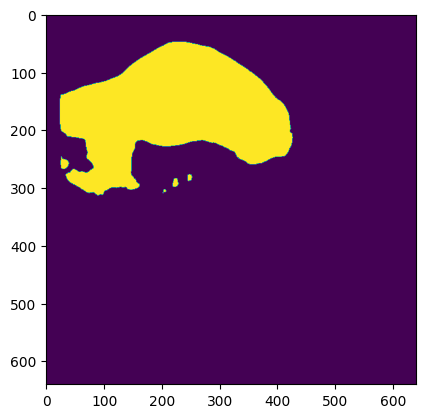

In [49]:
plt.imshow(results[0].masks.data.detach().cpu().numpy()[0,:,:])

In [50]:
def get_colored_mask(mask):

    colors = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180],[250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]
    r = np.zeros_like(mask).astype(np.uint8)
    g = np.zeros_like(mask).astype(np.uint8)
    b = np.zeros_like(mask).astype(np.uint8)
    r[mask == 1], g[mask == 1], b[mask == 1] = colors[random.randrange(0,10)]
    colored_mask = np.stack([r, g, b], axis=2)
    return colored_mask

In [51]:
img = cv2.imread("datasets2/train/images/0PPGMI7DR3TF_jpg.rf.46cf08c7142f20ee85e37212457244d2.jpg")
img = cv2.resize(img, (height,width), interpolation = cv2.INTER_AREA)
np.shape(img)

(640, 640, 3)

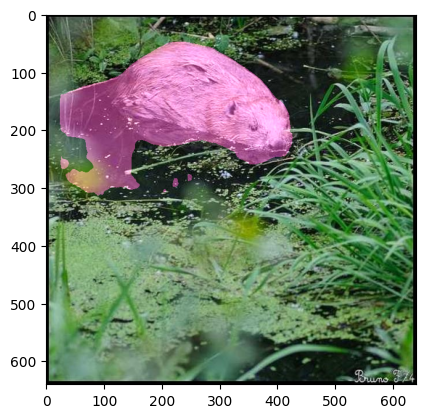

In [53]:
img = cv2.imread("datasets2/train/images/0PPGMI7DR3TF_jpg.rf.46cf08c7142f20ee85e37212457244d2.jpg")
img = cv2.resize(img, (height,width), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for r in range(results[0].masks.shape[0]):
    im_array = results[0].masks.data[r,:,:].cpu().numpy()
    rgb_mask = get_colored_mask(results[0].masks.data.detach().cpu().numpy()[r,:,:])
    img = cv2.addWeighted(img, 1, rgb_mask, 0.5, 0) 
img = Image.fromarray(img)  # RGB PIL image
plt.imshow(img)
img.show()  # show image

# Let's see how can we train the model

This model works with polygon masks!

In [61]:
# Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it

model = YOLO('yolov8n-seg.pt')
model.train(data='datasets/data.yaml', epochs=10, imgsz=640, optimizer = 'Adam')

Ultralytics YOLOv8.0.215 🚀 Python-3.9.13 torch-1.13.1+cpu CPU (AMD Ryzen 7 6800H with Radeon Graphics)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=datasets/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes

train: Scanning C:\Users\pancz\OneDrive\Asztali gép\Tanulmányok\ELTE Budapest\1.Semester\Deep Network\2.Assignment\datasets\train\labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
val: Scanning C:\Users\pancz\OneDrive\Asztali gép\Tanulmányok\ELTE Budapest\1.Semester\Deep Network\2.Assignment\datasets\valid\labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to runs\segment\train2\labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\segment\train2
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.136      2.841      3.029      1.542          9        640: 100%|██████████| 3/3 [00:33<00:00, 11.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         10         13      0.003      0.692       0.17     0.0539      0.001      0.231   0.000945   0.000276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.272      2.612      2.261      1.516         12        640: 100%|██████████| 3/3 [00:27<00:00,  9.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]

                   all         10         13     0.0125      0.538      0.073     0.0169    0.00714      0.308     0.0111    0.00219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.266      2.095      1.954      1.574         10        640: 100%|██████████| 3/3 [00:22<00:00,  7.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]

                   all         10         13    0.00788      0.462      0.153     0.0369    0.00394      0.231    0.00725   0.000725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.351      2.564      1.917      1.539         10        640: 100%|██████████| 3/3 [00:19<00:00,  6.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all         10         13     0.0064      0.692      0.123      0.026     0.0064      0.692     0.0407    0.00944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.503      2.506      1.662        1.7         15        640: 100%|██████████| 3/3 [00:20<00:00,  6.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]

                   all         10         13    0.00707      0.769      0.123     0.0252    0.00354      0.385     0.0262    0.00555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.503      2.435      1.755      1.708         13        640: 100%|██████████| 3/3 [00:22<00:00,  7.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all         10         13    0.00688      0.769      0.058     0.0249    0.00481      0.538     0.0152    0.00392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.563      2.202      1.684      1.889         14        640: 100%|██████████| 3/3 [00:20<00:00,  6.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]

                   all         10         13     0.0108      0.769      0.122     0.0326     0.0065      0.462      0.051     0.0078



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.476      2.127      1.537      1.766          9        640: 100%|██████████| 3/3 [00:20<00:00,  6.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]

                   all         10         13     0.0125      0.769      0.216     0.0552    0.00998      0.615     0.0471     0.0148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.271      1.778      1.399        1.6         10        640: 100%|██████████| 3/3 [00:20<00:00,  6.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]

                   all         10         13      0.594      0.538      0.431      0.205      0.428      0.385      0.355      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.207      1.729      1.273      1.485         16        640: 100%|██████████| 3/3 [00:24<00:00,  8.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]

                   all         10         13      0.576      0.524      0.499       0.27      0.769      0.308      0.418      0.184



10 epochs completed in 0.074 hours.
Optimizer stripped from runs\segment\train2\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\train2\weights\best.pt, 6.8MB

Validating runs\segment\train2\weights\best.pt...
Ultralytics YOLOv8.0.215 🚀 Python-3.9.13 torch-1.13.1+cpu CPU (AMD Ryzen 7 6800H with Radeon Graphics)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


                   all         10         13      0.578      0.527      0.497      0.269       0.77      0.308      0.417      0.183
Speed: 2.1ms preprocess, 153.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\segment\train2


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000018F88337A00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0410

In [58]:
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import os

# Define the get_colored_mask function
def get_colored_mask(mask):
    colors = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180],[250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]
    r = np.zeros_like(mask).astype(np.uint8)
    g = np.zeros_like(mask).astype(np.uint8)
    b = np.zeros_like(mask).astype(np.uint8)
    r[mask == 1], g[mask == 1], b[mask == 1] = colors[random.randrange(0,10)]
    colored_mask = np.stack([r, g, b], axis=2)
    return colored_mask

# Load the trained YOLOv8 model
model2 = YOLO('yolov8n-seg.pt')

# Specify the path to the directory containing validation or training images
images_dir = 'Test'  # Update with the correct path

# Specify the path to save the prediction results
output_dir = 'Predictions'  # Update with the desired output path

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List all image files in the directory
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Loop through each image
for image_file in image_files:
    image_path = os.path.join(images_dir, image_file)
    
    # Make predictions on the image
    results = model.predict(source=image_path, conf=0.1)  # Adjust confidence threshold

    # Check if any objects are detected
    if results and results[0].masks is not None:
        # Visualize the original image
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title('Original Image')
        
        # Save the original image to the output directory
        plt.savefig(os.path.join(output_dir, f'original_{image_file}'))
        plt.close()  # Close the current figure
        
        # Visualize the segmentation masks
        for r in range(results[0].masks.shape[0]):
            im_array = results[0].masks.data[r, :, :].cpu().numpy()
            rgb_mask = get_colored_mask(im_array)
            
            # Convert img and rgb_mask to Numpy arrays
            img_array = np.array(img)
            rgb_mask_array = np.array(rgb_mask)
            
            img = cv2.addWeighted(img_array, 1, rgb_mask_array, 0.5, 0)

        # Display the image with segmentation masks
        img_with_masks = Image.fromarray(img)  # RGB PIL image
        plt.imshow(img_with_masks)
        plt.title('Image with Segmentation Masks')
        
        # Save the image with segmentation masks to the output directory
        plt.savefig(os.path.join(output_dir, f'with_masks_{image_file}'))
        plt.close()  # Close the current figure
    else:
        print(f"No objects detected in {image_file}")



image 1/1 c:\Users\pancz\OneDrive\Asztali gép\Tanulmányok\ELTE Budapest\1.Semester\Deep Network\2.Assignment\Test\09MDD1JHOAF6.jpg: 480x640 (no detections), 130.1ms
Speed: 3.4ms preprocess, 130.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
No objects detected in 09MDD1JHOAF6.jpg

image 1/1 c:\Users\pancz\OneDrive\Asztali gép\Tanulmányok\ELTE Budapest\1.Semester\Deep Network\2.Assignment\Test\10EHZ40RP2OS.jpg: 448x640 (no detections), 101.1ms
Speed: 2.4ms preprocess, 101.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)
No objects detected in 10EHZ40RP2OS.jpg

image 1/1 c:\Users\pancz\OneDrive\Asztali gép\Tanulmányok\ELTE Budapest\1.Semester\Deep Network\2.Assignment\Test\10JZ6QD918PO.jpg: 640x448 (no detections), 88.4ms
Speed: 2.0ms preprocess, 88.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)
No objects detected in 10JZ6QD918PO.jpg

image 1/1 c:\Users\pancz\OneDrive\Asztali gép\Tanulmányok\ELTE Budapest\1.Semester\Deep N